In [ ]:
#Downloading Datasets into storage for usage
!wget https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-development.tsv
!wget https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-validation.tsv
!wget https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-test.tsv
!ls

--2022-05-04 00:34:13--  https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-development.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1080993 (1.0M) [text/plain]
Saving to: ‘gap-development.tsv’

gap-development.tsv 100%[===================>]   1.03M  --.-KB/s    in 0.06s   

2022-05-04 00:34:13 (16.9 MB/s) - ‘gap-development.tsv’ saved [1080993/1080993]

--2022-05-04 00:34:14--  https://raw.githubusercontent.com/google-research-datasets/gap-coreference/master/gap-validation.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent,

In [ ]:
#importing needed libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
gap_train = pd.read_csv("/content/gap-development.tsv",delimiter='\t')
gap_test = pd.read_csv("/content/gap-test.tsv",delimiter='\t')
gap_valid = pd.read_csv("/content/gap-validation.tsv",delimiter='\t')

In [ ]:
gap_train.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica_Rivera


1. ID - Unique identifier for an example (Matches to Id in output file format)
2. Text - Text containing the ambiguous pronoun and two candidate names (about a paragraph in length)
3. Pronoun - The target pronoun (text)
4. Pronoun-offset The character offset of Pronoun in Text
5. A - The first name candidate (text)
6. A-offset - The character offset of name A in Text
7. B - The second name candidate
8. B-offset - The character offset of name B in Text
9. URL - The URL of the source Wikipedia page for the example

In [ ]:
#we print the unique pronouns to understand what we have to work with
pronouns = gap_train["Pronoun"]
np.unique(pronouns)

array(['He', 'Her', 'His', 'She', 'he', 'her', 'him', 'his', 'she'],
      dtype=object)

Text(0.5, 1.0, 'GAP Test')

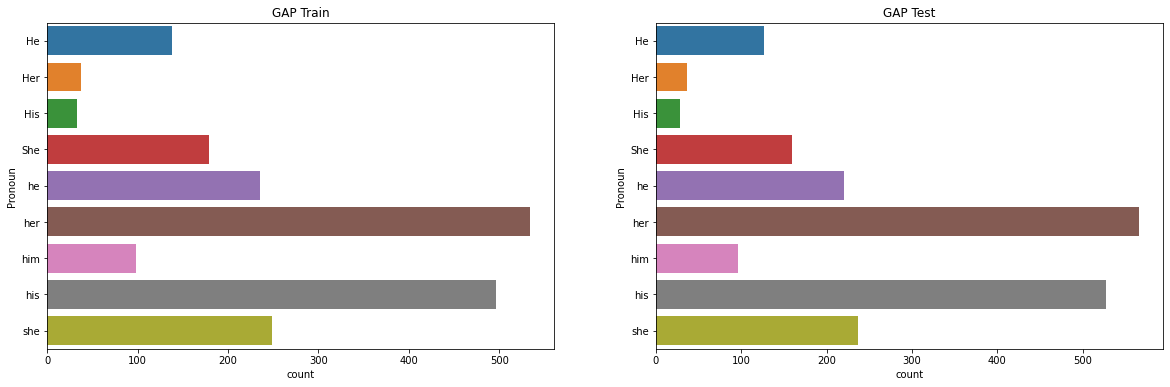

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
pronoun_list = ['He', 'Her', 'His', 'She', 'he', 'her', 'him', 'his', 'she']

sns.countplot(y='Pronoun',order = pronoun_list, ax=ax[0], data=gap_train)
ax[0].set_title("GAP Train")

sns.countplot(y='Pronoun',order = pronoun_list, ax=ax[1], data=gap_test)
ax[1].set_title("GAP Test")

Text(0.5, 1.0, 'GAP Train B')

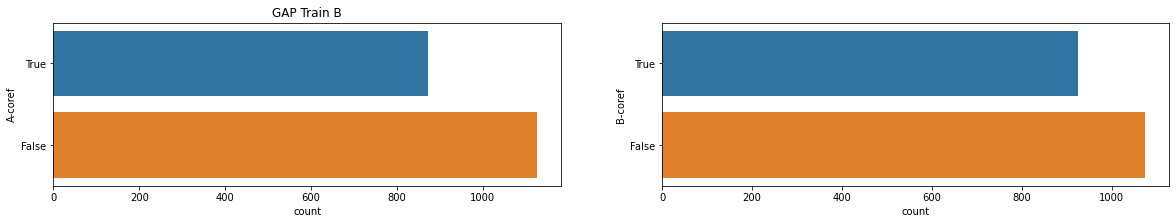

In [ ]:
#we print out the coreference for A and B and their distribution for the train data
fig, ax = plt.subplots(1, 2, figsize=(20,3))
sns.countplot(y='A-coref', order = [True, False], ax=ax[0], data=gap_train)
ax[0].set_title("GAP Train A")

sns.countplot(y='B-coref', order = [True, False], ax=ax[1], data=gap_train)
ax[0].set_title("GAP Train B")


In [ ]:
gap_train

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica_Rivera
...,...,...,...,...,...,...,...,...,...,...,...
1995,development-1996,"Faye's third husband, Paul Resnick, reported t...",her,433,Nicole,255,False,Faye,328,True,http://en.wikipedia.org/wiki/Faye_Resnick
1996,development-1997,The plot of the film focuses on the life of a ...,her,246,Doris Chu,111,False,Mei,215,True,http://en.wikipedia.org/wiki/Two_Lies
1997,development-1998,Grant played the part in Trevor Nunn's movie a...,she,348,Maria,259,True,Imelda Staunton,266,False,http://en.wikipedia.org/wiki/Sir_Andrew_Aguecheek
1998,development-1999,The fashion house specialised in hand-printed ...,She,284,Helen,145,True,Suzanne Bartsch,208,False,http://en.wikipedia.org/wiki/Helen_David


In [ ]:
gap_test

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,test-1,Upon their acceptance into the Kontinental Hoc...,His,383,Bob Suter,352,False,Dehner,366,True,http://en.wikipedia.org/wiki/Jeremy_Dehner
1,test-2,"Between the years 1979-1981, River won four lo...",him,430,Alonso,353,True,Alfredo Di St*fano,390,False,http://en.wikipedia.org/wiki/Norberto_Alonso
2,test-3,Though his emigration from the country has aff...,He,312,Ali Aladhadh,256,True,Saddam,295,False,http://en.wikipedia.org/wiki/Aladhadh
3,test-4,"At the trial, Pisciotta said: ``Those who have...",his,526,Alliata,377,False,Pisciotta,536,True,http://en.wikipedia.org/wiki/Gaspare_Pisciotta
4,test-5,It is about a pair of United States Navy shore...,his,406,Eddie,421,True,Rock Reilly,559,False,http://en.wikipedia.org/wiki/Chasers
...,...,...,...,...,...,...,...,...,...,...,...
1995,test-1996,"The sole exception was Wimbledon, where she pl...",She,479,Goolagong Cawley,400,True,Peggy Michel,432,False,http://en.wikipedia.org/wiki/Evonne_Goolagong_...
1996,test-1997,"According to news reports, both Moore and Fily...",her,338,Esther Sheryl Wood,263,True,Barbara Morgan,404,False,http://en.wikipedia.org/wiki/Hastings_Arthur_Wise
1997,test-1998,"In June 2009, due to the popularity of the Sab...",She,328,Kayla,364,True,Natasha Henstridge,412,False,http://en.wikipedia.org/wiki/Raya_Meddine
1998,test-1999,She was delivered to the Norwegian passenger s...,she,305,Irma,255,True,Bergen,274,False,http://en.wikipedia.org/wiki/SS_Irma_(1905)


# tokenize and word2vec


In [ ]:
import re 

def tokenize(text):
    text = str(text)
    # remove non-ascii characters
    cleaned_text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # make the text lowercase
    cleaned_text = cleaned_text.lower()

    # splitting words along with punctuation before or after (eg: good. -> good + . , "lmao" +> " + lmao + ", [Dang] -> [ + Dang + ])
    cleaned_text = re.sub(r'(\w+)([.,!?:;\[\]*/"\'\(\)])', r'\1 \2', cleaned_text)
    cleaned_text = re.sub(r'([.,!?:;\[\]*/"\'\(\)])(\w+)', r'\1 \2', cleaned_text)

    return cleaned_text


In [ ]:
import gensim.downloader

# downloading pretrained glove vectors
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')
print("Model Loaded")


[==================================================] 100.0% 66.0/66.0MB downloaded
Model Loaded


In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

In [ ]:
def getvec(word, text):
  " function to get word vectors "
  # dictionary of glove vectors
  vec = glove_vectors.wv

  try: 
    return vec[word]
  except:
    return vec["unk"]

def get_bert_vecs(words, text):
  # Add the special tokens.
  marked_text = "[CLS] " + text + " [SEP]"

  # Split the sentence into tokens.
  tokenized_text = tokenizer.tokenize(marked_text)

  # Map the token strings to their vocabulary indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

  # Mark all the tokens as belonging to sentence "1".
  segments_ids = [1] * len(tokenized_text)

  # Convert inputs to PyTorch tensors
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])

  # Run the text through BERT, and collect all of the hidden states produced
  # from all 12 layers. 

  with torch.no_grad():
      states = model(tokens_tensor, segments_tensors).hidden_states

  output = torch.stack([states[i] for i in range(len(states))]).sum(dim = 0)
  output = output.squeeze()
  # print(tokenized_text)
  # print(output.size())
  bert_vecs = []
  for word in words:
    output_tokens = tokenizer.tokenize(word)
    # print(output_tokens)

    output_vectors = [output[tokenized_text.index(x)] for x in output_tokens]
    bert_vec = output_vectors[0]
    for vec in output_vectors[1:]:
      bert_vec = torch.add(bert_vec, vec)
    bert_vecs.append(bert_vec)
  return bert_vecs


In [ ]:
import torch

def preprocessing(data, bert = True):
  " function to generate word vectors along with their context vectors"
  if bert:
    x_train = np.empty(0)
    y_train = np.empty(0)

    for j in range(len(data)):

      text = tokenize(data["Text"][j])


      offset = 0
      poff = data["Pronoun-offset"][j]
      aoff = data["A-offset"][j]
      boff = gap_train["B-offset"][j]

      p = tokenize(data["Pronoun"][j])
      a = tokenize(data["A"][j])
      b = tokenize(data["B"][j])

      pf = 0
      af = 0
      bf = 0

      vecs = get_bert_vecs([a, b, p], text)
      pvec = vecs[2]
      avec = vecs[0]
      bvec = vecs[1]

      words = tokenize(data["Text"][j]).split()

      x_train = np.append(x_train, torch.cat((avec, pvec), 0), axis=0)
      x_train = np.append(x_train, torch.cat((bvec, pvec), 0), axis=0)
      
      if(data["A-coref"][j]):
        y_train = np.append(y_train, 1)
      else:
        y_train = np.append(y_train, 0)

      if(data["B-coref"][j]):
        y_train = np.append(y_train, 1)
      else:
        y_train = np.append(y_train, 0)
      # print(x_train.shape, y_train.shape)  
    x_train = x_train.reshape(-1,1536)
    
    return x_train, y_train


  else:
    x_train = np.empty(0)
    y_train = np.empty(0)

    for j in range(len(data)):

      text = tokenize(data["Text"][j])


      offset = 0
      poff = data["Pronoun-offset"][j]
      aoff = data["A-offset"][j]
      boff = gap_train["B-offset"][j]

      p = tokenize(data["Pronoun"][j]).split()
      a = tokenize(data["A"][j]).split()
      b = tokenize(data["B"][j]).split()

      pf = 0
      af = 0
      bf = 0

      pvec = torch.zeros(768)
      avec = torch.zeros(768)
      bvec = torch.zeros(768)
      cpvec = torch.zeros(768)
      cavec = torch.zeros(768)
      cbvec = torch.zeros(768)

      words = tokenize(data["Text"][j]).split()

      for i in range(len(words)):
        offset += len(words[i])
        offset += 1
        if(offset >= aoff and a[0] == words[i] and af == 0):
          af = 1
          for x in range(len(a)):
            avec = torch.add(avec, torch.tensor(getvec(words[i + x], text)))
          for x in range(5):
            cavec = torch.add(cavec, torch.tensor(getvec(words[min(len(words) - 1, i + x + len(a))], text)))
            cavec = torch.add(cavec, torch.tensor(getvec(words[max(0 ,i - x - 1)], text)))
        if(offset >= boff and b[0] == words[i] and bf == 0):
          bf = 1
          for x in range(len(b)):
            bvec = torch.add(bvec, torch.tensor(getvec(words[i + x], text)))
          for x in range(5):
            cbvec = torch.add(cbvec, torch.tensor(getvec(words[min(len(words) - 1,i + x + len(a))], text)))
            cbvec = torch.add(cbvec, torch.tensor(getvec(words[max(0,i - x - 1)], text)))
        if(offset >= poff and p[0] == words[i] and pf == 0):
          pf = 1
          for x in range(len(p)):
            pvec = torch.add(pvec, torch.tensor(getvec(words[i + x], text)))
          for x in range(5):
            cpvec = torch.add(cpvec, torch.tensor(getvec(words[min(len(words) - 1,i + x + len(a))], text)))
            cpvec = torch.add(cpvec, torch.tensor(getvec(words[max(0,i - x - 1)], text)))
      x_train = np.append(x_train, torch.cat((avec, cavec, pvec, cpvec), 0), axis=0)
      x_train = np.append(x_train, torch.cat((bvec, cbvec, pvec, cpvec), 0), axis=0)

      x_train = np.append(x_train, torch.cat((avec, pvec), 0), axis=0)
      x_train = np.append(x_train, torch.cat((bvec, pvec), 0), axis=0)
      
      if(data["A-coref"][j]):
        y_train = np.append(y_train, 1)
      else:
        y_train = np.append(y_train, 0)

      if(data["B-coref"][j]):
        y_train = np.append(y_train, 1)
      else:
        y_train = np.append(y_train, 0)
      
    x_train = x_train.reshape(-1,200)

    return x_train, y_train


In [ ]:
#defining dataset class
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]  

  def __len__(self):
    return self.length

In [ ]:
#defining the network
from torch import nn
from torch.nn import functional as F

class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)  
  
  def forward(self,x):
    # print(x.shape)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [ ]:
x1, y1 = preprocessing(gap_train)
x2, y2 = preprocessing(gap_valid)

X_train = np.append(x1, x2, axis = 0)
Y_train = np.append(y1, y2, axis = 0)

trainset = dataset(X_train,Y_train)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

(3072,) (2,)
(6144,) (4,)
(9216,) (6,)
(12288,) (8,)
(15360,) (10,)
(18432,) (12,)
(21504,) (14,)
(24576,) (16,)
(27648,) (18,)
(30720,) (20,)
(33792,) (22,)
(36864,) (24,)
(39936,) (26,)
(43008,) (28,)
(46080,) (30,)
(49152,) (32,)
(52224,) (34,)
(55296,) (36,)
(58368,) (38,)
(61440,) (40,)
(64512,) (42,)
(67584,) (44,)
(70656,) (46,)
(73728,) (48,)
(76800,) (50,)
(79872,) (52,)
(82944,) (54,)
(86016,) (56,)
(89088,) (58,)
(92160,) (60,)
(95232,) (62,)
(98304,) (64,)
(101376,) (66,)
(104448,) (68,)
(107520,) (70,)
(110592,) (72,)
(113664,) (74,)
(116736,) (76,)
(119808,) (78,)
(122880,) (80,)
(125952,) (82,)
(129024,) (84,)
(132096,) (86,)
(135168,) (88,)
(138240,) (90,)
(141312,) (92,)
(144384,) (94,)
(147456,) (96,)
(150528,) (98,)
(153600,) (100,)
(156672,) (102,)
(159744,) (104,)
(162816,) (106,)
(165888,) (108,)
(168960,) (110,)
(172032,) (112,)
(175104,) (114,)
(178176,) (116,)
(181248,) (118,)
(184320,) (120,)
(187392,) (122,)
(190464,) (124,)
(193536,) (126,)
(196608,) (128,)


In [ ]:
print(X_train.shape, Y_train.shape)

(4908, 1536) (4908,)


In [ ]:
#hyper parameters
learning_rate = 0.01
epochs = 500

# Model , Optimizer, Loss
be_model = Net(input_shape=1536)
optimizer = torch.optim.SGD(be_model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()


In [ ]:
# training a binary classifier for pa or pb

#forward 

for i in range(epochs):
  if i == 200:
    torch.save(be_model, "eng_coref_2")
  running_loss = 0
  last_loss = 0
  for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
    output = be_model(x_train)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
     
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    
  avg_loss = running_loss/ len(trainloader)
  
  print("epoch {}\tloss : {}".format(i,avg_loss))

epoch 0	loss : 0.6046979303483839
epoch 1	loss : 0.5164653430511426
epoch 2	loss : 0.46643023676686474
epoch 3	loss : 0.4355484057556499
epoch 4	loss : 0.40638253518513273
epoch 5	loss : 0.3740259523128534
epoch 6	loss : 0.3581811075473761
epoch 7	loss : 0.33693745654898805
epoch 8	loss : 0.317955015154628
epoch 9	loss : 0.273243741749169
epoch 10	loss : 0.2652031320643115
epoch 11	loss : 0.2593149561193082
epoch 12	loss : 0.2308815499017765
epoch 13	loss : 0.21503420154769698
epoch 14	loss : 0.1985793745556435
epoch 15	loss : 0.16938382832260876
epoch 16	loss : 0.12218033246599234
epoch 17	loss : 0.15110747525831322
epoch 18	loss : 0.2383820851418105
epoch 19	loss : 0.20118829433794144
epoch 20	loss : 0.14005082869878063
epoch 21	loss : 0.17463737174675062
epoch 22	loss : 0.10883409288022425
epoch 23	loss : 0.05871164970486969
epoch 24	loss : 0.04382600840906818
epoch 25	loss : 0.03467357527561389
epoch 26	loss : 0.028378907845101574
epoch 27	loss : 0.02370270754077605
epoch 28	loss :

In [ ]:
x_test, y_test = preprocessing(gap_test)

(3072,) (2,)
(6144,) (4,)
(9216,) (6,)
(12288,) (8,)
(15360,) (10,)
(18432,) (12,)
(21504,) (14,)
(24576,) (16,)
(27648,) (18,)
(30720,) (20,)
(33792,) (22,)
(36864,) (24,)
(39936,) (26,)
(43008,) (28,)
(46080,) (30,)
(49152,) (32,)
(52224,) (34,)
(55296,) (36,)
(58368,) (38,)
(61440,) (40,)
(64512,) (42,)
(67584,) (44,)
(70656,) (46,)
(73728,) (48,)
(76800,) (50,)
(79872,) (52,)
(82944,) (54,)
(86016,) (56,)
(89088,) (58,)
(92160,) (60,)
(95232,) (62,)
(98304,) (64,)
(101376,) (66,)
(104448,) (68,)
(107520,) (70,)
(110592,) (72,)
(113664,) (74,)
(116736,) (76,)
(119808,) (78,)
(122880,) (80,)
(125952,) (82,)
(129024,) (84,)
(132096,) (86,)
(135168,) (88,)
(138240,) (90,)
(141312,) (92,)
(144384,) (94,)
(147456,) (96,)
(150528,) (98,)
(153600,) (100,)
(156672,) (102,)
(159744,) (104,)
(162816,) (106,)
(165888,) (108,)
(168960,) (110,)
(172032,) (112,)
(175104,) (114,)
(178176,) (116,)
(181248,) (118,)
(184320,) (120,)
(187392,) (122,)
(190464,) (124,)
(193536,) (126,)
(196608,) (128,)


In [ ]:
testset = dataset(x_test,y_test)
testloader = DataLoader(testset,batch_size=1,shuffle=False)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

predicted_vals = []
actual_vals = []

for i,(x_test,y_test) in enumerate(testloader):
  
  #calculate output
  output = be_model(x_test)

  if output >= 0.5:
    predicted_vals.append(1)
  else:
    predicted_vals.append(0)
  actual_vals.append( int(y_test.item()) )

predicted_vals = np.array(predicted_vals)
actual_vals = np.array(actual_vals)


# predicted_vals
# actual_vals
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(actual_vals, predicted_vals)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(actual_vals, predicted_vals, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(actual_vals, predicted_vals, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(actual_vals, predicted_vals, average='weighted')
print('F1 score: %f' % f1)
# roc-auc_score
roc = roc_auc_score(actual_vals, predicted_vals)
print('roc score: %f' % roc)

# confusion matrix
matrix = confusion_matrix(actual_vals, predicted_vals)
print(matrix)   

Accuracy: 0.730750
Precision: 0.731322
Recall: 0.730750
F1 score: 0.730986
roc score: 0.728185
[[1672  555]
 [ 522 1251]]


In [ ]:
torch.save(be_model, "eng_coref_bert1")